# 이미지 불러오기 및 이미지 확인

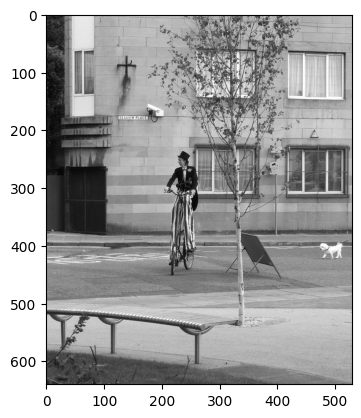

In [46]:
import inference
import cv2
import numpy as np
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

image_path = "/home/tbelldev/workspace/autoLabeling/api_test/user_dataset_sample/000000289343.jpg"

image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

# OD (Object-Detection) 추론

In [47]:
result_box = inference.inference_triton(image_path,class_name = ["person"],label_type = "bbox")
print(result_box)

speed: 0.07454109191894531
{'bboxes__0': [array([203.37982, 239.04868, 263.79453, 437.08463], dtype=float32)], 'classes__1': [0], 'scores__2': [0.99106604], 'shape__3': array([640, 529])}


# 추론 결과 확인

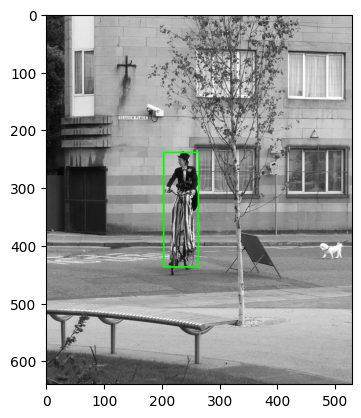

score :  99.1066038608551


In [48]:
box = result_box['bboxes__0'][0].tolist()
bbox = list(map(int, box))
image_copy = image.copy()
image_with_box = cv2.rectangle(image_copy,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(0,255,0),2)
plt.imshow(image_with_box)
plt.show()

print("score : ",result_box['scores__2'][0]*100)

# IS (Instance-Segmentation) 추론

In [49]:
result_seg = inference.inference_triton(image_path,class_name = ["person"],label_type = "segment")
print(result_seg)

speed: 0.06081199645996094
{'SCORES': [0.99040425], 'MASKS': [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)], 'CLASSES': [0], 'BBOXES': [array([204.25308, 235.02176, 264.6595 , 426.76053], dtype=float32)]}


# 추론 결과 확인

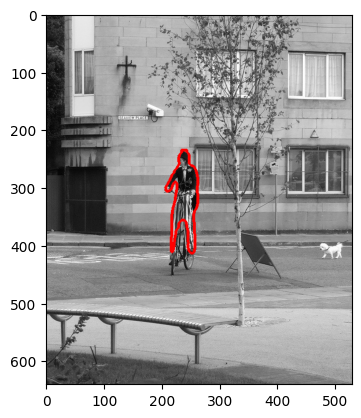

score :  99.04042482376099


In [50]:
segment_mask = result_seg["MASKS"][0]
contours = []

contour, _ = cv2.findContours(segment_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours.append(contour[0])
image_copy_seg = image.copy()
for contour in contours:
    cv2.drawContours(image_copy_seg, [contour], -1, (255,0,0), 3)
    
plt.imshow(image_copy_seg)
plt.show()

print("score : ",result_seg['SCORES'][0]*100)

# 결과 후 처리

In [51]:
from modules.formatter import coco_format_inverter

response_data = coco_format_inverter(result_box)
print("Object-Detection 결과 : ")
print(response_data)
print("\n")
response_data = coco_format_inverter(result_seg)
print("Segmentation 결과 : ")
print(response_data)

Object-Detection 결과 : 
[{'annotations': [{'id': 0, 'image_id': 0, 'category_id': 0, 'bbox': [203, 239, 263, 437], 'area': 114931, 'segmentation': [], 'iscrowd': 0}]}]


Segmentation 결과 : 
[{'annotations': [{'segmentation': [[253.0, 412.9980392156863, 249.0, 412.9980392156863, 244.00196078431372, 407.0, 243.00196078431372, 373.0, 240.00196078431372, 359.0, 238.0, 355.9980392156863, 233.0, 355.9980392156863, 228.99803921568628, 361.0, 228.99803921568628, 367.0, 223.99803921568628, 374.0, 219.99803921568628, 406.0, 217.0, 410.9980392156863, 214.00196078431372, 409.0, 215.00196078431372, 345.0, 221.00196078431372, 321.0, 222.00196078431372, 308.0, 224.00196078431372, 302.0, 224.00196078431372, 292.0, 223.0, 289.9980392156863, 219.99803921568628, 291.0, 216.99803921568628, 300.0, 213.0, 304.9980392156863, 207.0, 305.9980392156863, 205.00196078431372, 304.0, 204.00196078431372, 299.0, 212.00196078431372, 286.0, 215.00196078431372, 277.0, 219.00196078431372, 273.0, 220.00196078431372, 269.0, 